In [1]:
import cv2
import numpy
from matplotlib import pyplot as plt
from lib_image_seg.lib_seg import *
from lib_cv_detection import *


In [2]:
def crop_image(img0, rect):
    img=img0.copy()
    minx=max(0,min(rect[:,0]))
    maxx=min(img.shape[1]-1,max(rect[:,0]))
    miny=max(0,min(rect[:,1]))
    maxy=min(img.shape[0]-1,max(rect[:,1]))
    return img[miny:maxy, minx:maxx]

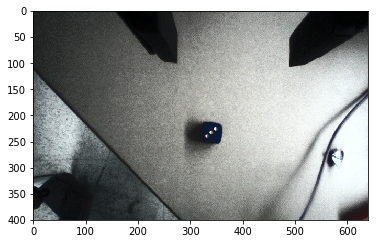

In [7]:
filename="images/imgmid3.png"
img=cv2.imread(filename)
img=equalize_image(img, filter_size=0)
imshow(img)
plt.show()

label_dict, total labels =  3


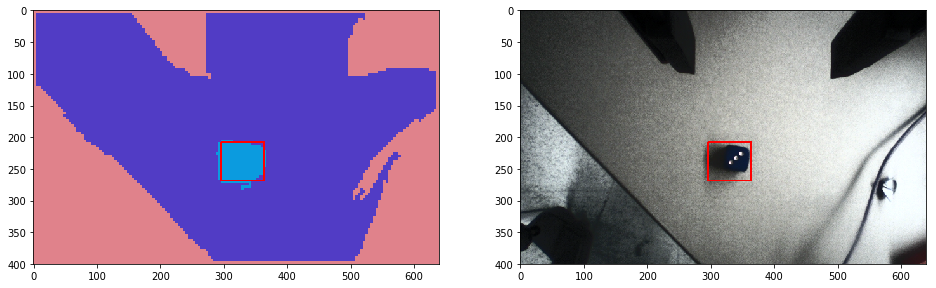

In [8]:
# rects, labeled_img=find_all_objects(img, K=10000)
rects, labeled_img=find_all_objects(img, CHANGE_TO_HSV=False, IMAGE_RESIZE_SCALE=0.25,
                                    K=10000, sigma=0)

colored_image = find_all_objects_then_draw(rects, labeled_img)

plt.figure(figsize=(16,8))

plt.subplot(121)
colored_image = find_all_objects_then_draw(rects, labeled_img)
imshow(colored_image)

plt.subplot(122)
colored_image = find_all_objects_then_draw(rects, None, img)
imshow(colored_image)


plt.show()

number of dots 3


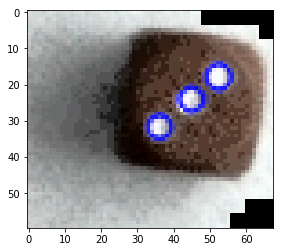

In [9]:
 for i in range(len(rects)):
    rect=rects[i]
    (center_x, center_y, radius_x, radius_y, angle)  = extract_rect(rect)
    
    mask=labeled_img==labeled_img[int(center_y),int(center_x)]
    ndots=detect_dots(img, mask, rect, IF_DRAW=True) # detect dots

        